# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Profissão- Cientista de Dados_M10_support material.csv')

df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [3]:
df.drop(columns=['Unnamed: 0','index','mau'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.3+ MB


In [4]:
df.corr()

<ipython-input-4-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,1.000000


<ipython-input-5-4c43eb1d7610>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

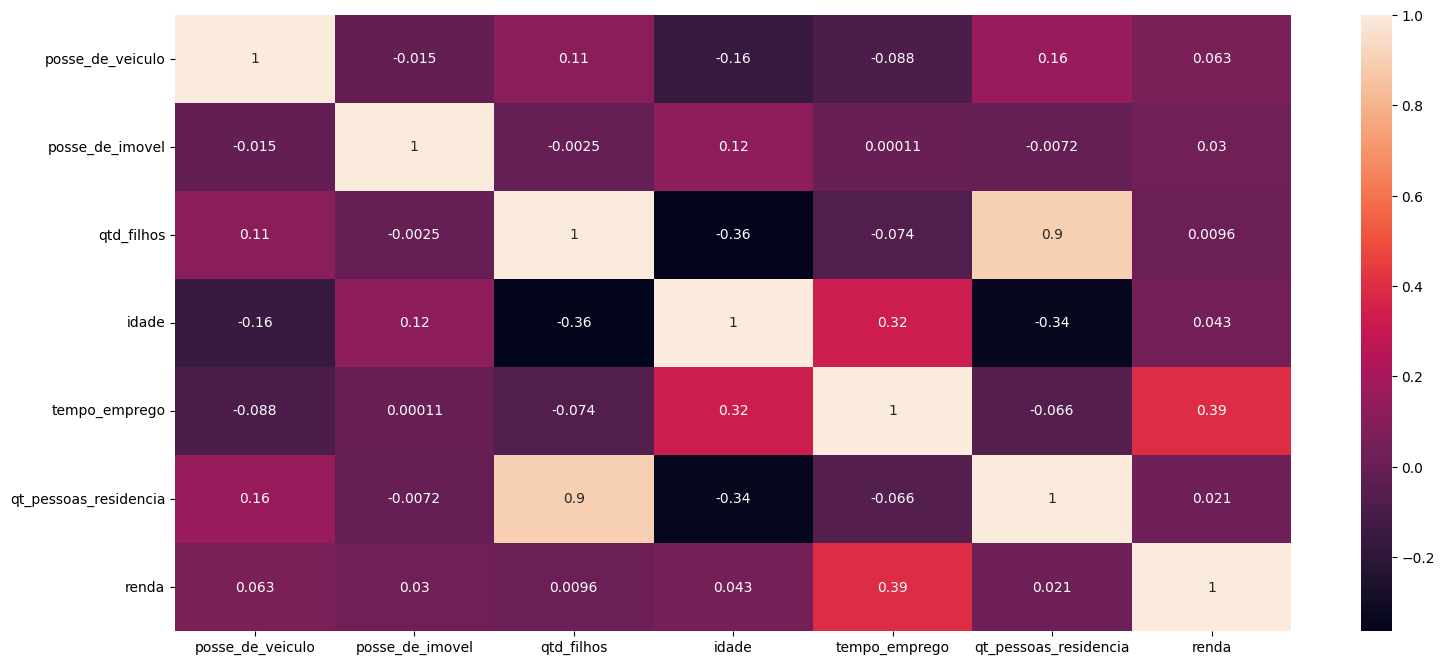

In [5]:
plt.rcParams['figure.figsize'] = (18,8)
sns.heatmap(df.corr(), annot=True)

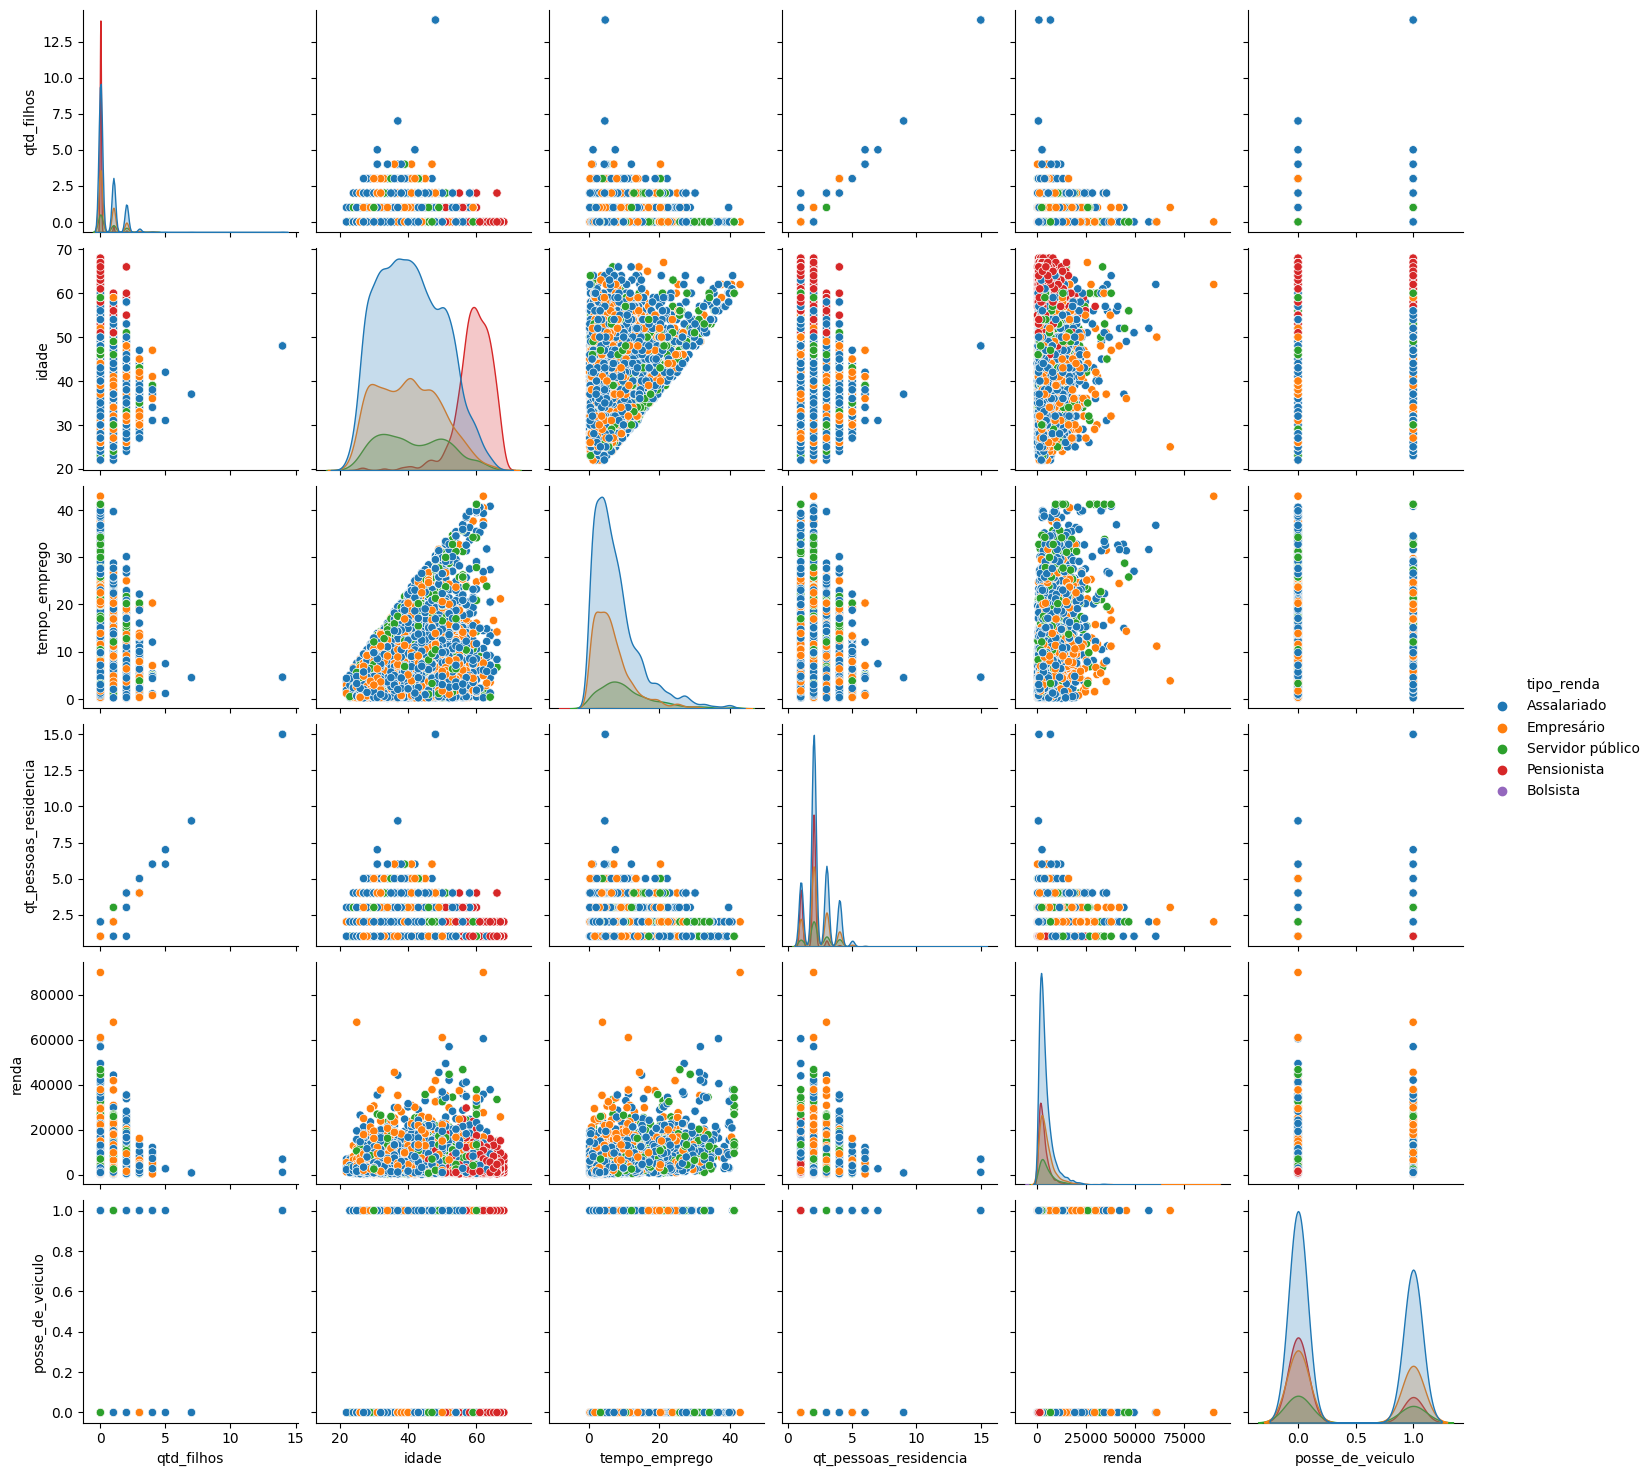

In [26]:
sns.pairplot(data=df, hue='tipo_renda', vars=['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda','posse_de_veiculo'])

Com a matriz de correlações, podemos observar um resultado de baixa correlação positiva de 0.39, o que significa que o valor da renda não aumenta proporcionalmente em relação ao tempo de emprego.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

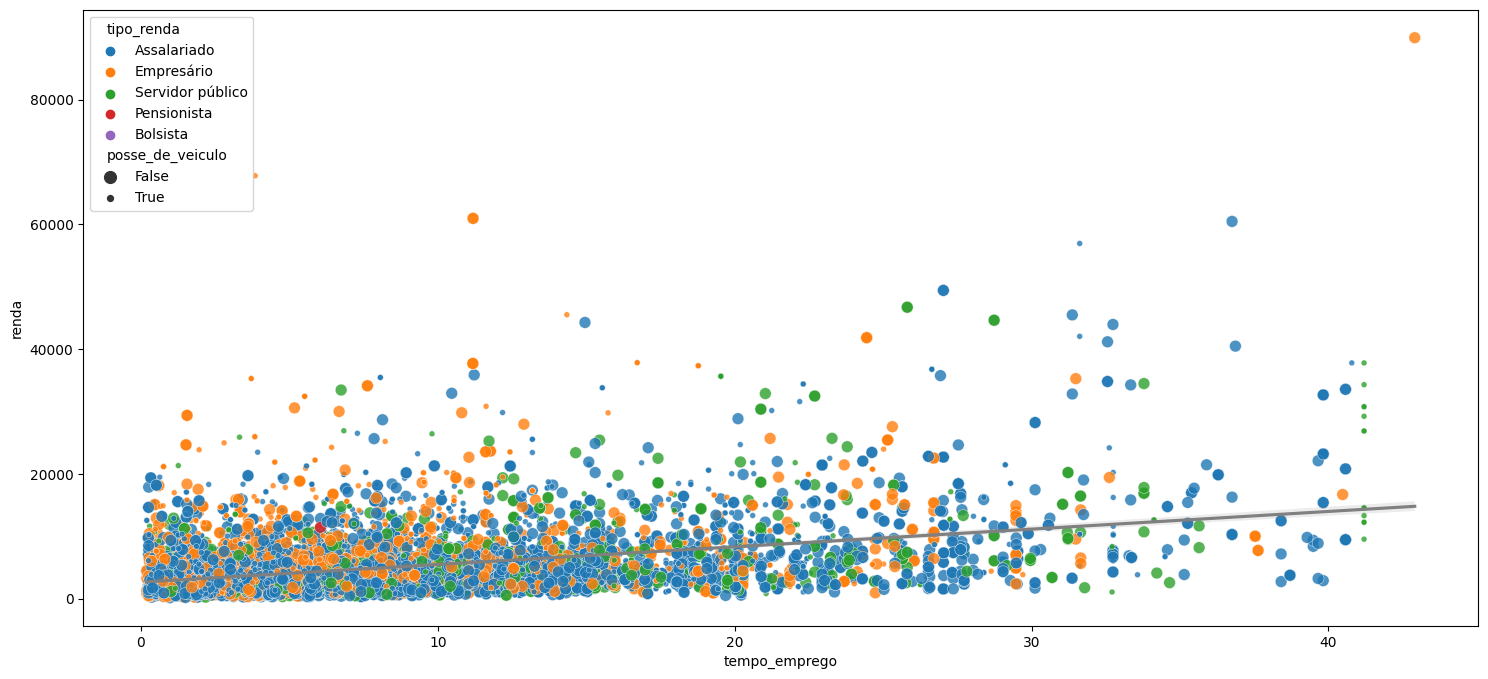

In [28]:
#variáveis mais correlacionadas com renda - Tempo_empreo (0.39) e Posse_de_veiculo (0.063)
plt.rcParams['figure.figsize'] = (18,8)
sns.scatterplot(x='tempo_emprego',y='renda', hue='tipo_renda',size='posse_de_veiculo',data=df,alpha = 0.8)
sns.regplot(x='tempo_emprego', y='renda', data=df, scatter=False, color='0.5')

<Axes: xlabel='posse_de_veiculo', ylabel='renda'>

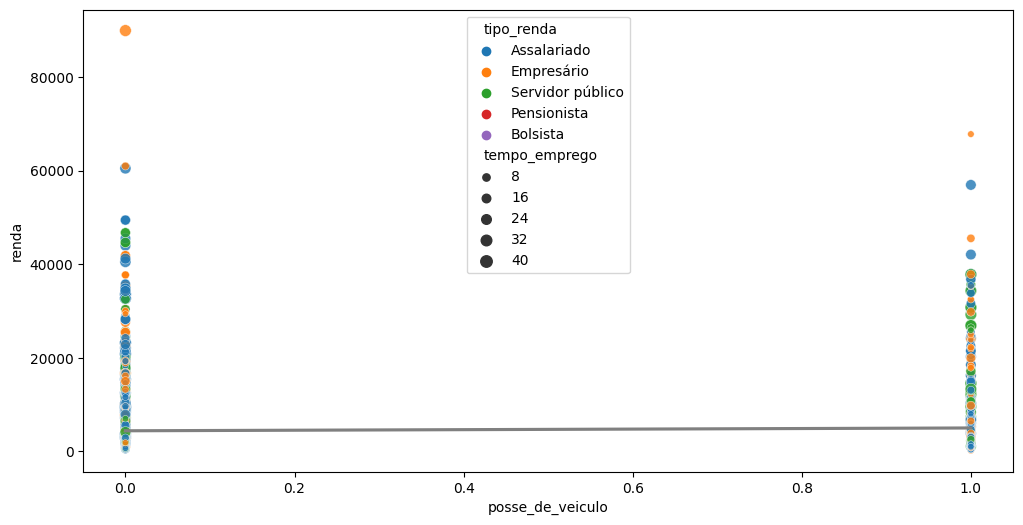

In [17]:
plt.rcParams['figure.figsize'] = (12,6)
sns.scatterplot(x='posse_de_veiculo',y='renda', hue='tipo_renda',size='tempo_emprego',data=df,alpha = 0.8)
sns.regplot(x='posse_de_veiculo', y='renda', data=df, scatter=False, color='0.5')

Embora a correlação entre a variável 'tempo_emprego' e a variável 'renda' não seja tão alta, é possível identificar facilmente a covariância através da inclinação da linha de tendência. Por outro lado, a variável 'posse_de_veiculo', que apresentou a segunda maior correlação, possui uma inclinação praticamente nula.

3) Na su aopinião, há outliers na variável renda?

Sim, existe um outlier na variável 'renda' dos clientes cujo tipo de renda é denominado "empresário". No entanto, acredito que isso não influencie no resultado dos gráficos, pois os outliers têm uma baixa quantidade de representatividade.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

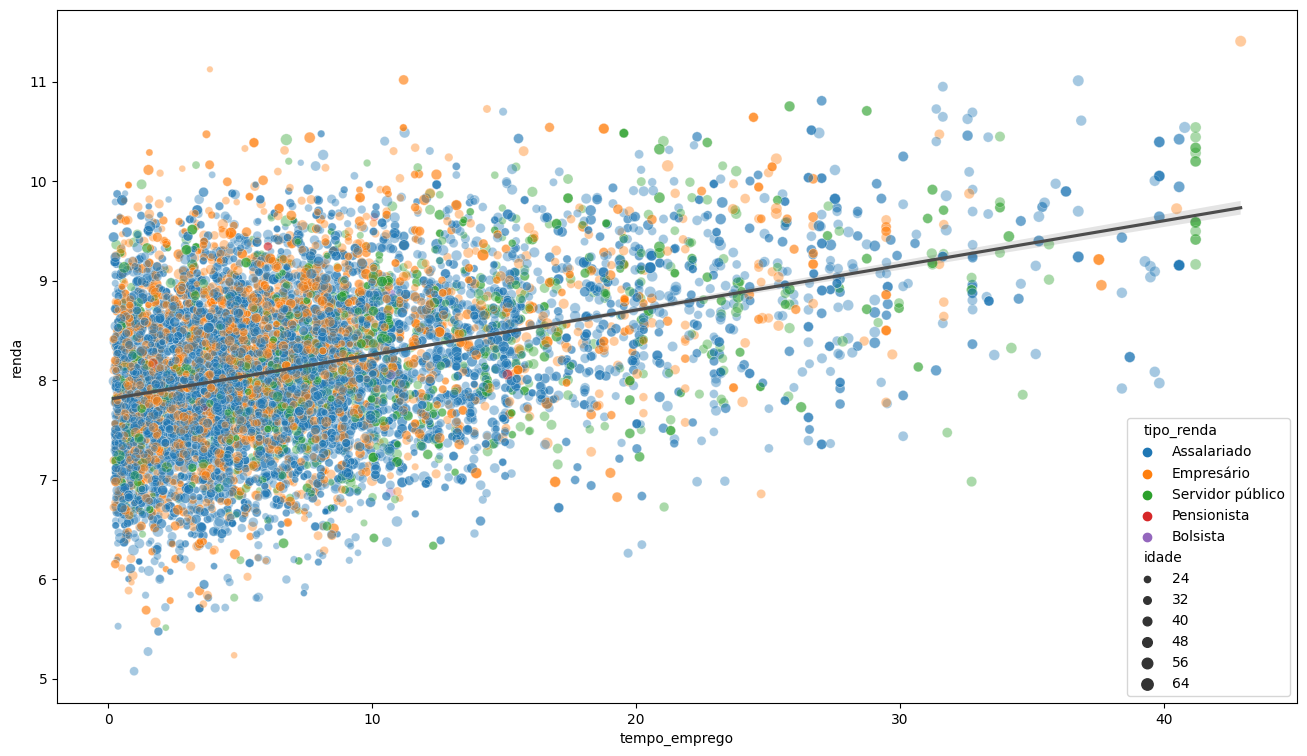

In [23]:
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego', y='renda', hue='tipo_renda', size='idade', data=df_log, alpha=0.4)

sns.regplot(x='tempo_emprego', y='renda', data=df_log, scatter=False, color='.3')

plt.show()

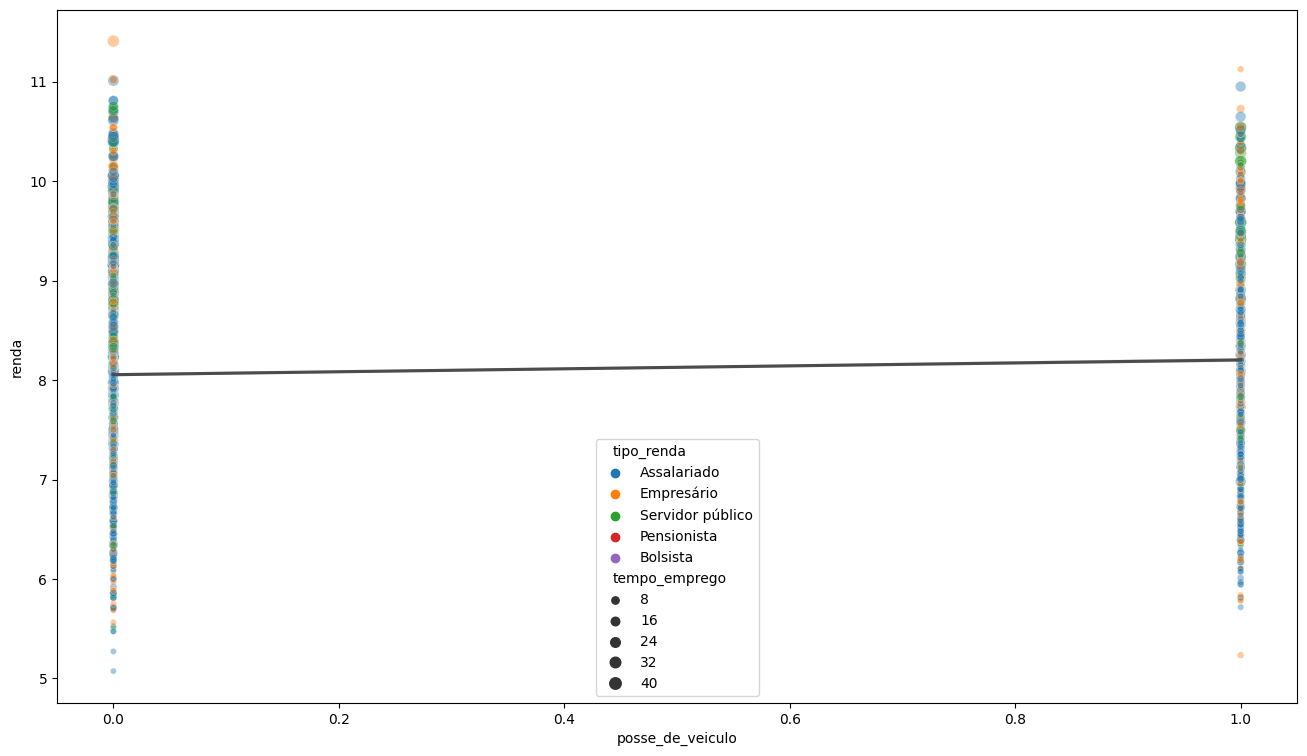

In [25]:
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='posse_de_veiculo', y='renda', hue='tipo_renda', size='tempo_emprego', data=df_log, alpha=0.4)

sns.regplot(x='posse_de_veiculo', y='renda', data=df_log, scatter=False, color='.3')

plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Após aplicar a função log, é possível perceber uma melhora na leitura e interpretação da variável 'renda'; porém, a variável "posse_de_veículo" não sofreu tantas alterações.